In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("counters.offline.csv")

data2=pd.read_csv("counters.online.csv")

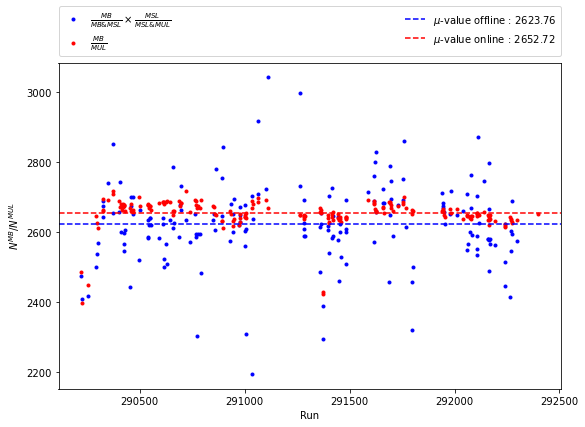

In [21]:
#l(2) and a(2) are respectively vertical and horizontal coordinates of plot with off(on)line data
l=[]
a=[]
l2=[]
a2=[]

#m(2) and n(2) permit to calculate the mu-value obtained with off(on)line data
m=0
n=0
m2=0
n2=0

#Fill in the lists with ratios and runs
for i in range(len(data.run)):
    l=l+[(data["cint7all"][i]/data["cint7all&0msl"][i])*(data["cmsl7all"][i]/data["cmsl7all&0mul"][i])]
    n+=1
    m+=l[i]
    a=a+[data["run"][i]]
    
for j in range(len(data2.run)):
    l2=l2+[data2["cint7l0b"][j]/data2["cmul7l0b"][j]]
    n2+=1
    m2+=l2[j]
    a2=a2+[data2["run"][j]]

plt.figure(figsize=(9,6))
plt.plot(a,l,"b.",label=r"$\frac{MB}{MB& MSL}\times\frac{MSL}{MSL& MUL}$")
plt.plot(a2,l2,"r.",label=r"$\frac{MB}{MUL}$")
plt.axhline(y=m/n,linestyle='--',color="blue",label=f"$\mu$-value offline : {round(m/n,2)}")
plt.axhline(y=m2/n2,linestyle='--',color="red",label=f"$\mu$-value online : {round(m2/n2,2)}")
plt.ylabel(r"$N^{MB}/N^{MUL}$")
plt.xlabel("Run")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("graph.pdf")